In [72]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
from PIL import Image
import glob

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [73]:
DATA_URI = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
data_frame = pandas.read_csv(DATA_URI, sep = '\t')

#### 1. Вывести: кол-во наблюдений в датасете

In [74]:
data_frame.shape[0]

4622

#### 2. Вывести названия столбцов

In [75]:
print(*data_frame.columns.values)

order_id quantity item_name choice_description item_price


#### 3. Определить самую частую позицию (item) в заказе

In [76]:
data_frame.item_name.mode()[0]

'Chicken Bowl'

#### 4. Построить гистрограмму частоты заказов по позициям (item )

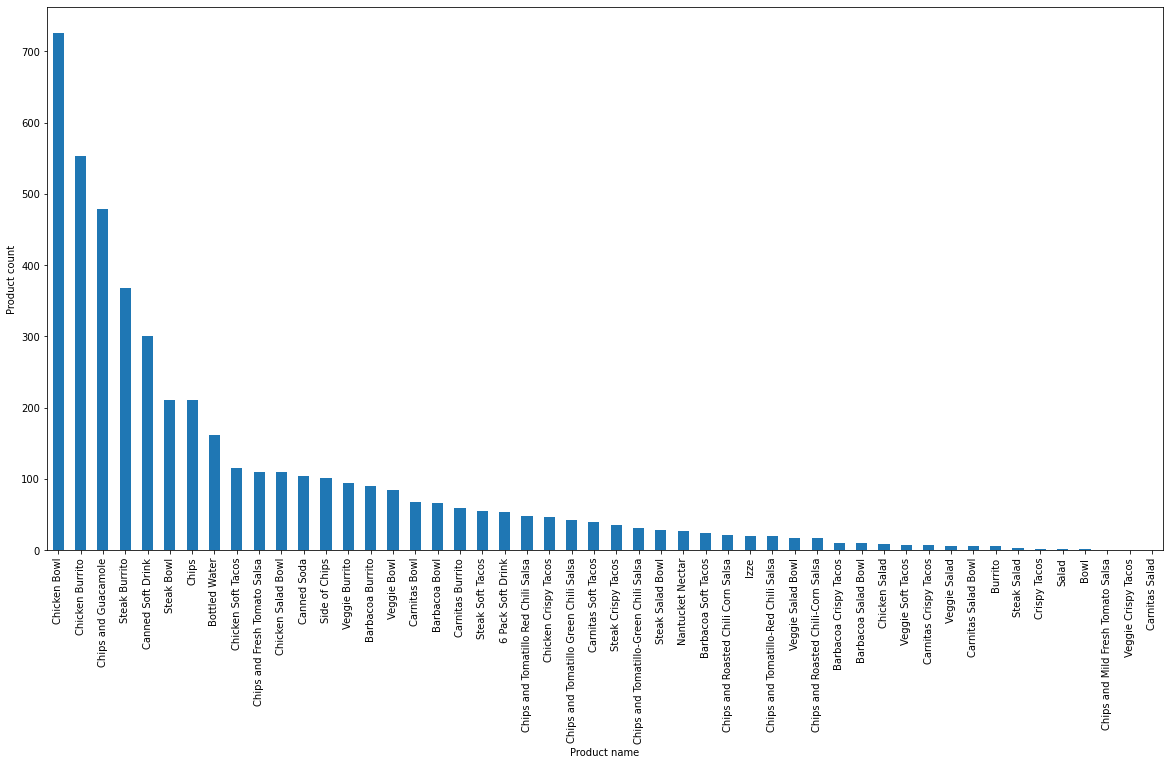

In [77]:
item_count = data_frame.item_name.value_counts()
order_frequency_histogram = item_count.plot(kind='bar', 
                                            figsize=(20, 10), 
                                            xlabel="Product name", 
                                            ylabel="Product count")

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [78]:
data_frame.item_price = data_frame.item_price.apply(lambda x: float(x[1:]))

#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

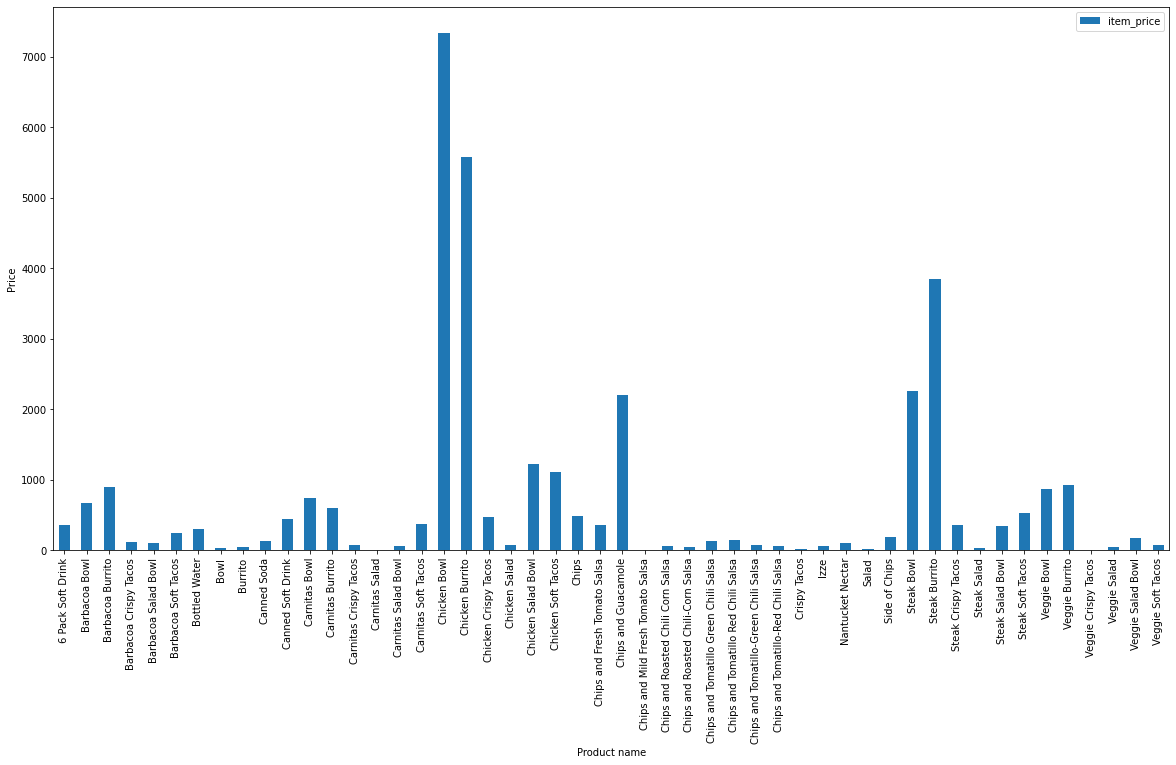

In [79]:
item_grouped = data_frame.groupby(['item_name']).sum().drop(['order_id', 'quantity'], axis=1)
item_profit_histogram = item_grouped.plot(kind='bar', 
                                          figsize=(20, 10),
                                          xlabel="Product name", 
                                          ylabel="Price")

#### 7. Средняя сумма заказа? (минимум 2 способа)

In [80]:
round(data_frame.groupby(['order_id']).sum().mean().item_price, 2)

18.81

In [81]:
round(data_frame.item_price.sum() / data_frame.order_id.nunique(), 2)

18.81

#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [82]:
data_frame.groupby(['order_id']).nunique().item_name.describe()[['mean', 'min', 'max', '50%']]

mean    2.34024
min     1.00000
max     8.00000
50%     2.00000
Name: item_name, dtype: float64

#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [83]:
def get_statistics(df):
   return df.drop('order_id', axis=1).describe()

In [84]:
is_steak = data_frame.item_name.str.contains('Steak')
get_statistics(data_frame[is_steak])

,quantity,item_price
count,702.000000,702.000000
mean,1.045584,10.518889
std,0.228314,2.566743
min,1.000000,8.690000
25%,1.000000,8.990000
50%,1.000000,9.250000
75%,1.000000,11.750000
max,3.000000,27.750000


In [85]:
is_steak_type = data_frame.choice_description.str.contains('Hot|Mild|Medium', na=False)
get_statistics(data_frame[is_steak_type])

,quantity,item_price
count,783.000000,783.000000
mean,1.054917,9.772031
std,0.238920,2.588239
min,1.000000,8.190000
25%,1.000000,8.490000
50%,1.000000,8.990000
75%,1.000000,10.980000
max,3.000000,32.940000


#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [86]:
USD_TO_RUB = 75.77

data_frame.insert(len(data_frame.columns)-1, "item_price(rub)", round(data_frame.item_price * USD_TO_RUB, 2), True)
data_frame = data_frame.loc[:,~data_frame.columns.duplicated()]
data_frame

,order_id,quantity,item_name,choice_description,item_price(rub),item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,181.09,2.39
1,1,1,Izze,[Clementine],256.86,3.39
2,1,1,Nantucket Nectar,[Apple],256.86,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,181.09,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",1286.57,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",890.30,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",890.30,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",852.41,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",662.99,8.75


#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

In [87]:
AGGREGATOR = {
    'quantity': sum,
    'item_price': sum,
    'item_name': lambda x: ", ".join(x)
}

data_frame.groupby('order_id').agg(AGGREGATOR)

,quantity,item_price,item_name
order_id,,,
1,4,11.56,"Chips and Fresh Tomato Salsa, Izze, Nantucket ..."
2,2,16.98,Chicken Bowl
3,2,12.67,"Chicken Bowl, Side of Chips"
4,2,21.00,"Steak Burrito, Steak Soft Tacos"
5,2,13.70,"Steak Burrito, Chips and Guacamole"
...,...,...,...
1830,2,23.00,"Steak Burrito, Veggie Burrito"
1831,3,12.90,"Carnitas Bowl, Chips, Bottled Water"
1832,2,13.20,"Chicken Soft Tacos, Chips and Guacamole"


In [88]:
data_frame[is_steak].groupby('order_id').agg(AGGREGATOR)

,quantity,item_price,item_name
order_id,,,
4,2,21.00,"Steak Burrito, Steak Soft Tacos"
5,1,9.25,Steak Burrito
16,1,8.99,Steak Burrito
20,1,11.75,Steak Burrito
21,1,8.99,Steak Burrito
...,...,...,...
1810,1,11.75,Steak Crispy Tacos
1818,1,9.39,Steak Salad Bowl
1829,1,11.75,Steak Burrito


#### 12. Определить цену по каждой позиции в отдельности. 

In [89]:
data_frame['price_per_item'] = round(data_frame['item_price'] / data_frame['quantity'], 2)

data_frame.groupby('item_name').agg({ 'price_per_item': lambda x:x.unique() })

,price_per_item
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [96]:
# loaders
from keras.datasets import mnist, fashion_mnist
from matplotlib import pyplot
from gensim import models
import scipy.io
# algos
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
# utils
import time
import glob

ModuleNotFoundError: No module named 'keras'

In [ ]:
def timed_reducer_run(reducer, dataset):
    start = time.time()
    result = reducer.fit_transform(dataset)
    x = result[:, 0]
    y = result[:, 1]
    return [x, y, time.time() - start]
    
# algorithm runner
def runner(dataset, dataset_title, colors):   
  print("Running algos for dataset", dataset_title)
  fig, x_axis = pyplot.subplots(3, figsize=(10, 50))
  fig.suptitle(dataset_title)

  [umap_x, umap_y, umap_time] = timed_reducer_run(umap.UMAP(random_state = 2), dataset)
  print("Transform of dataset", dataset_title, "via UMAP done in: ", umap_time)
  x_axis[0].scatter(umap_x, umap_y, c=colors, cmap='Spectral', s=1)
  x_axis[0].set_title("UMAP") 
    
  [tsne_x, tsne_y, tsne_time] = timed_reducer_run(TSNE(learning_rate='auto', n_jobs=-1, random_state=2), dataset)
  print("Transform of dataset", dataset_title, "via TSNE done in: ", tsne_time)
  x_axis[1].scatter(tsne_x, tsne_y, c=colors, cmap='Spectral', s=1)
  x_axis[1].set_title("TSNE")
    
  [pca_x, pca_y, pca_time] = timed_reducer_run(PCA(n_components=2), dataset)
  print("Transform of dataset", dataset_title, "via PCA done in: ", pca_time)
  x_axis[2].scatter(pca_x, pca_y, c=colors, cmap='Spectral', s=1)
  x_axis[2].set_title("PCA")